# Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

### Pendulum Decay

Read the data from the CSV file

In [2]:
df = pd.read_csv("Pendulum Decay.csv")
df

Time (s)  Energy (J)
0        0.004167    0.006415
1        0.012500    0.006349
2        0.020833    0.006316
3        0.029167    0.006248
4        0.037500    0.006216
...           ...         ...
68359  570.454167    0.000523
68360  570.462500    0.000529
68361  570.470833    0.000535
68362  570.479167    0.000529
68363  570.487500    0.000517

[68364 rows x 2 columns]

Plot it

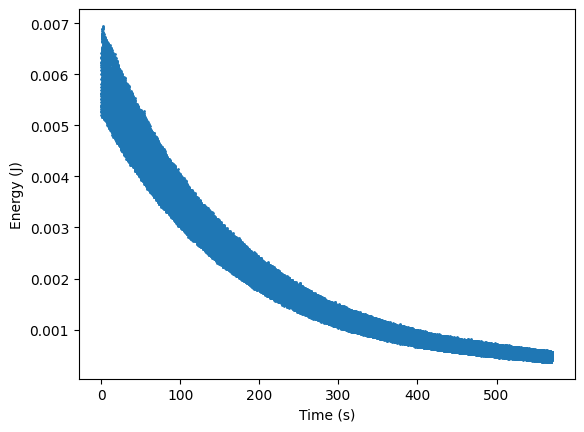

In [3]:
t = df["Time (s)"]
energy = df["Energy (J)"]
plt.scatter(t, energy, s=1)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

Why can't we see anything? It turns out that the data is too closely spaced.

We can sample it. Taking 1 point out of every 100 points,

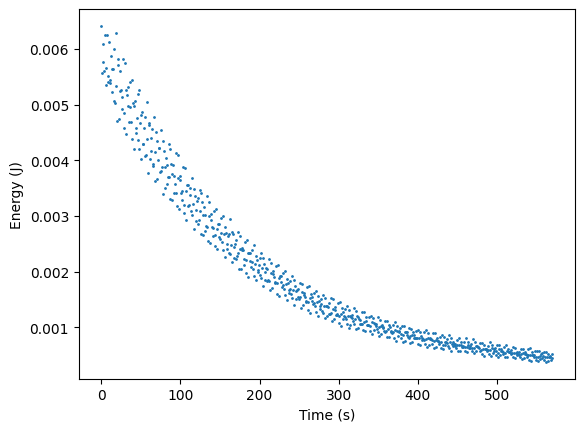

In [4]:
n_sample = 100
t_sample = t[::n_sample]
energy_sample = energy[::n_sample]

plt.scatter(t_sample, energy_sample, s=1)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

We define a fitting equation: $$ y=A e^{-\alpha x} $$
Why? Because $y=e^{-x}$ looks like this

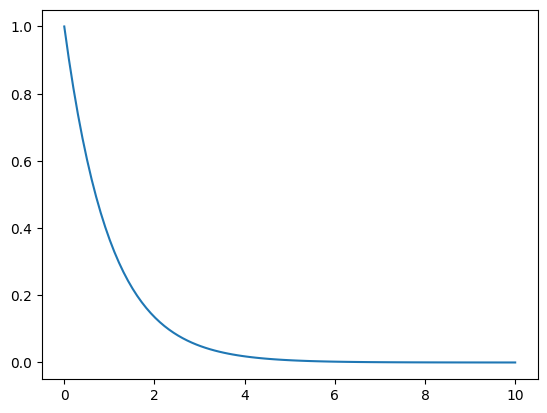

In [5]:
plt.plot(np.linspace(0, 10, 100), np.exp(-np.linspace(0, 10, 100)))
plt.show()

We just need to scale $x$ and $y$ to match the data, hence $A$ and $\alpha$.

In [6]:
def func(x, A, alpha):
    return A*np.exp(-alpha*x)

Fit and plot the results

In [7]:
popt, pcov = curve_fit(func, t_sample, energy_sample)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


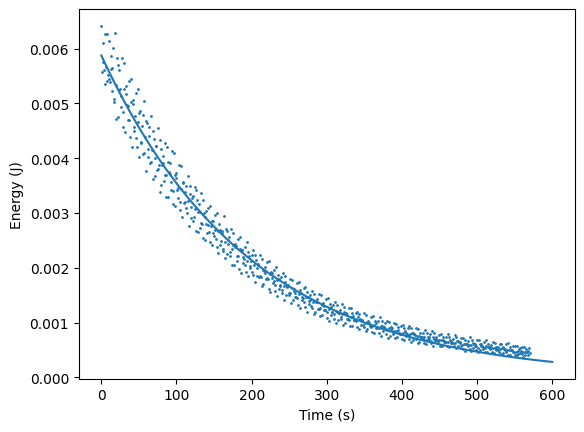

In [8]:
xLin = np.linspace(0, 600, 100)
plt.scatter(t_sample, energy_sample, s=1)
plt.plot(xLin, func(xLin, *popt))
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

In [9]:
popt

array([0.00587586, 0.00505577])

Fitted values are:
$$A = 0.00587586$$
$$\alpha = 0.00505577$$
So the predictive equation is:
$$y = 0.00587586 e^{-0.00505577 x}$$

At x=600, y is

In [10]:
func(600, *popt)

0.00028291544023655783

Which corresponds to this point on the graph

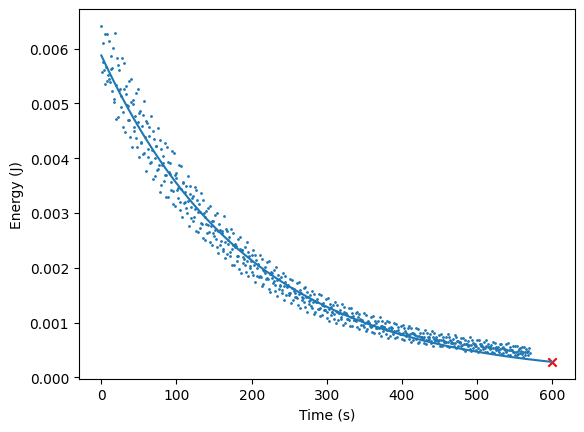

In [11]:
xLin = np.linspace(0, 600, 100)
plt.scatter(t_sample, energy_sample, s=1)
plt.plot(xLin, func(xLin, *popt))
plt.scatter(600, 0.00028291544023655783, marker="x", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

# Classification

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Introduction

Load the dataset

In [2]:
irisData = sklearn.datasets.load_iris()
print(irisData.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Print a sample of the dataset

In [3]:
df = pd.DataFrame(irisData.data)
df.columns = irisData.feature_names
df["species"] = irisData.target_names[irisData.target]
df.sample(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
132                6.4               2.8                5.6               2.2   
25                 5.0               3.0                1.6               0.2   
137                6.4               3.1                5.5               1.8   
83                 6.0               2.7                5.1               1.6   
97                 6.2               2.9                4.3               1.3   
104                6.5               3.0                5.8               2.2   
39                 5.1               3.4                1.5               0.2   
110                6.5               3.2                5.1               2.0   
44                 5.1               3.8                1.9               0.4   
34                 4.9               3.1                1.5               0.2   

        species  
132   virginica  
25       setosa  
137   virginica  
83   versicolor  
97   versicolor  
104   virginica  
39       setosa  
110   virginica  
44       setosa  
34       setosa

Plot a scatter with the unknown species highlighted in red

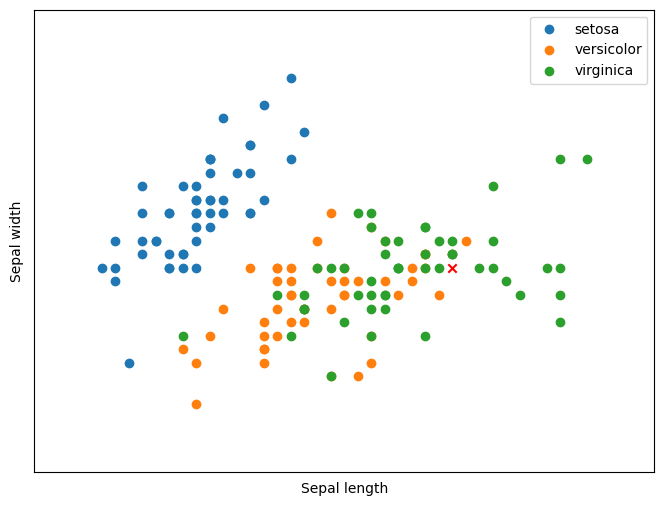

In [4]:
X = irisData.data[:, :2]
y = irisData.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

colors = ["C0", "C1", "C2"]
labels = ["setosa", "versicolor", "virginica"]
for idx in range(len(colors)):
    plt.scatter(X[:, 0][y==idx], X[:, 1][y==idx], c=colors[idx], label=labels[idx])
plt.scatter(6.9, 3, c="r", marker="x")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.legend()
# plt.savefig("Presentation Images/iris scatter.svg", transparent=True)
plt.show()

It seems that the unknown species is virginica. While we can visually assign the class for one point, imagine doing so for thousands of points. How can we make the computer do this automatically?

## KNN

Train a K Nearest Neighbours classifier.

We want to see how accurate it is. So, we split the data into training and testing data. The model will use the training data as "neighbours" to assign classes to the testing data.

Then, we compare the model-assigned classes to the actual classes.

In [5]:
x = df.loc[:, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
y = df["species"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

First 5 rows of training data

In [8]:
df_train = pd.DataFrame(np.concatenate((x_train, np.array([np.array(y_train)]).T), axis=1))
df_test = pd.DataFrame(np.concatenate((x_test, np.array([np.array(y_test)]).T), axis=1))
df_train.columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"]
df_test.columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"]
df_train.head()

sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  \
0               6.3              2.7               4.9              1.8   
1               5.0              3.5               1.3              0.3   
2               6.4              2.7               5.3              1.9   
3               6.2              2.9               4.3              1.3   
4               6.7              3.1               4.7              1.5   

      species  
0   virginica  
1      setosa  
2   virginica  
3  versicolor  
4  versicolor

First 5 rows of testing data

In [9]:
df_test.head()

sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  \
0               6.5              3.0               5.5              1.8   
1               5.5              3.5               1.3              0.2   
2               6.4              2.8               5.6              2.1   
3               7.7              3.8               6.7              2.2   
4               5.6              3.0               4.1              1.3   

      species  
0   virginica  
1      setosa  
2   virginica  
3   virginica  
4  versicolor

In [10]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(KNN_prediction, y_test))

KNN Accuracy: 0.9666666666666667


It seems that the classifier is pretty accurate. 

But what did the model classify incorrectly? We can plot a *Confusion Matrix*.

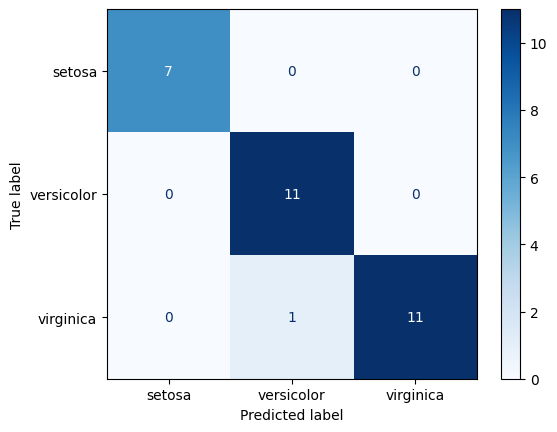

In [11]:
confusion_matrix(KNN_prediction, y_test)

disp = ConfusionMatrixDisplay.from_estimator(
    KNN_model,
    x_test,
    y_test,
    display_labels=irisData.target_names,
    cmap=plt.cm.Blues,
)

plt.show()

Out of 29 testing data points, the model assigned the wrong class for only 1.

One of the virginica flowers was incorrectly thought to be versicolor.

We can plot a *Decision Boundary*. This tells what class the model will assign for any point.

In [12]:
x = df.loc[:, ["sepal length (cm)", "sepal width (cm)"]].values
y = irisData.target

x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                 np.arange(y_min, y_max, 0.01))

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x, y)
KNN_prediction = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
KNN_prediction = KNN_prediction.reshape(xx.shape)

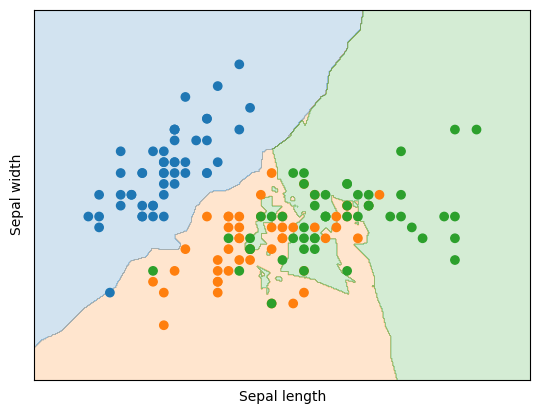

In [15]:
cmap = matplotlib.colors.ListedColormap(["C0", "C1", "C2"])

plt.contourf(xx, yy, KNN_prediction, alpha=0.2, cmap=cmap)
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=irisData.target, cmap=cmap)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
# plt.savefig("Presentation Images/iris example.svg", transparent=True)
plt.show()

# Clustering

In [79]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

import sklearn.datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbow

## Iris Dataset

Let's use the *Iris Dataset* again, but this time, we pretend we don't know the flower species.

In [8]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names

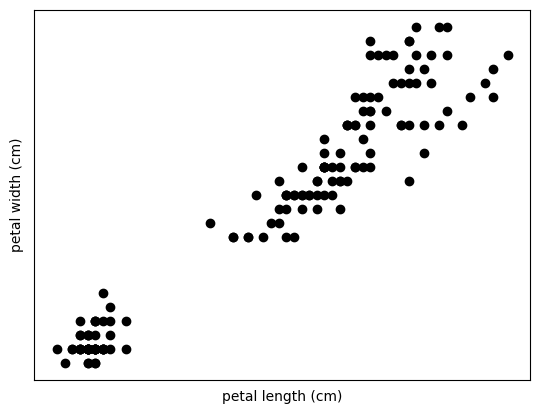

In [12]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], color="k")
plt.xticks(())
plt.yticks(())
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
# plt.savefig("Presentation Images/iris_cluster_1.svg", transparent=True)
plt.show()

We try clustering with 2 clusters

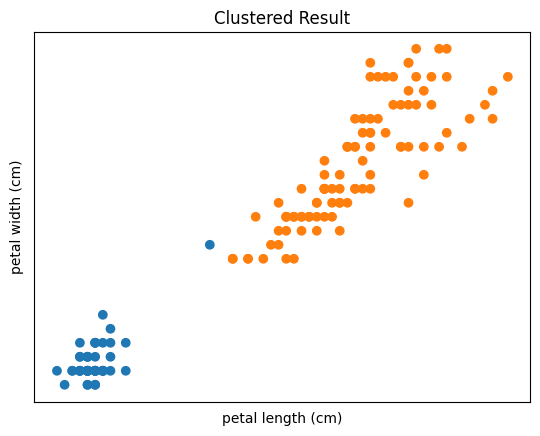

In [56]:
cmap = ListedColormap(["C0", "C1"])
kmeans = KMeans(n_clusters=2).fit(df.iloc[:, 2:])
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], c=kmeans.labels_, cmap=cmap)
plt.xticks(())
plt.yticks(())
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("Clustered Result")
# plt.savefig("Presentation Images/iris_cluster_2.svg", transparent=True)
plt.show()

Okay... But because we are cheaters ~~SOL~~ and we know that there are 3 flower species, we try clustering with 3 cluster.

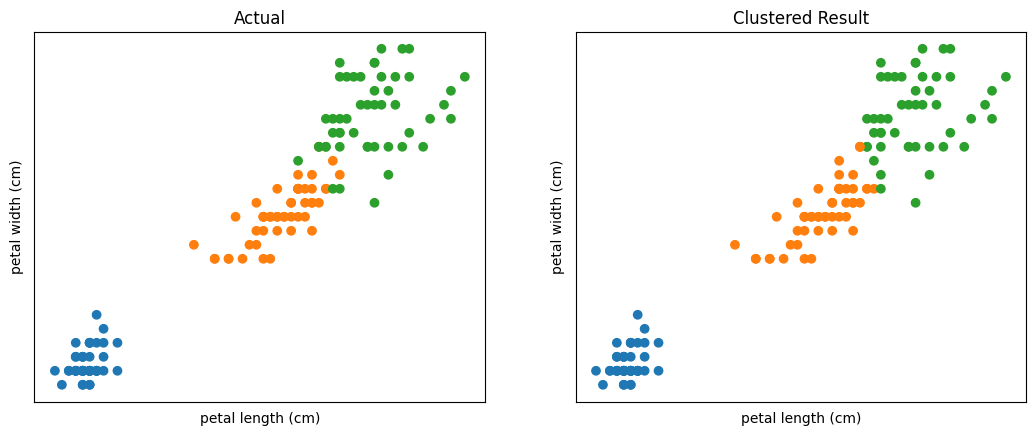

In [57]:
cmap = ListedColormap(["C0", "C1", "C2"])
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.iloc[:, 2:])
labels = kmeans.labels_.copy()
labels[kmeans.labels_ == 0] = 0
labels[kmeans.labels_ == 2] = 1
labels[kmeans.labels_ == 1] = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax2.scatter(df["petal length (cm)"], df["petal width (cm)"], c=labels, cmap=cmap)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("petal length (cm)")
ax2.set_ylabel("petal width (cm)")
ax2.set_title("Clustered Result")

ax1.scatter(df["petal length (cm)"], df["petal width (cm)"], c=iris.target, cmap=cmap)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("petal length (cm)")
ax1.set_ylabel("petal width (cm)")
ax1.set_title("Actual")
plt.show()

Pretty Accurate.

But one would be forgiven for assuming there're 2 clusters at first glance. How do we decide how many clusters to have? How do we know that in this case, there're actually 3 clusters when we don't know the number of flower species?

## Elbow Plot

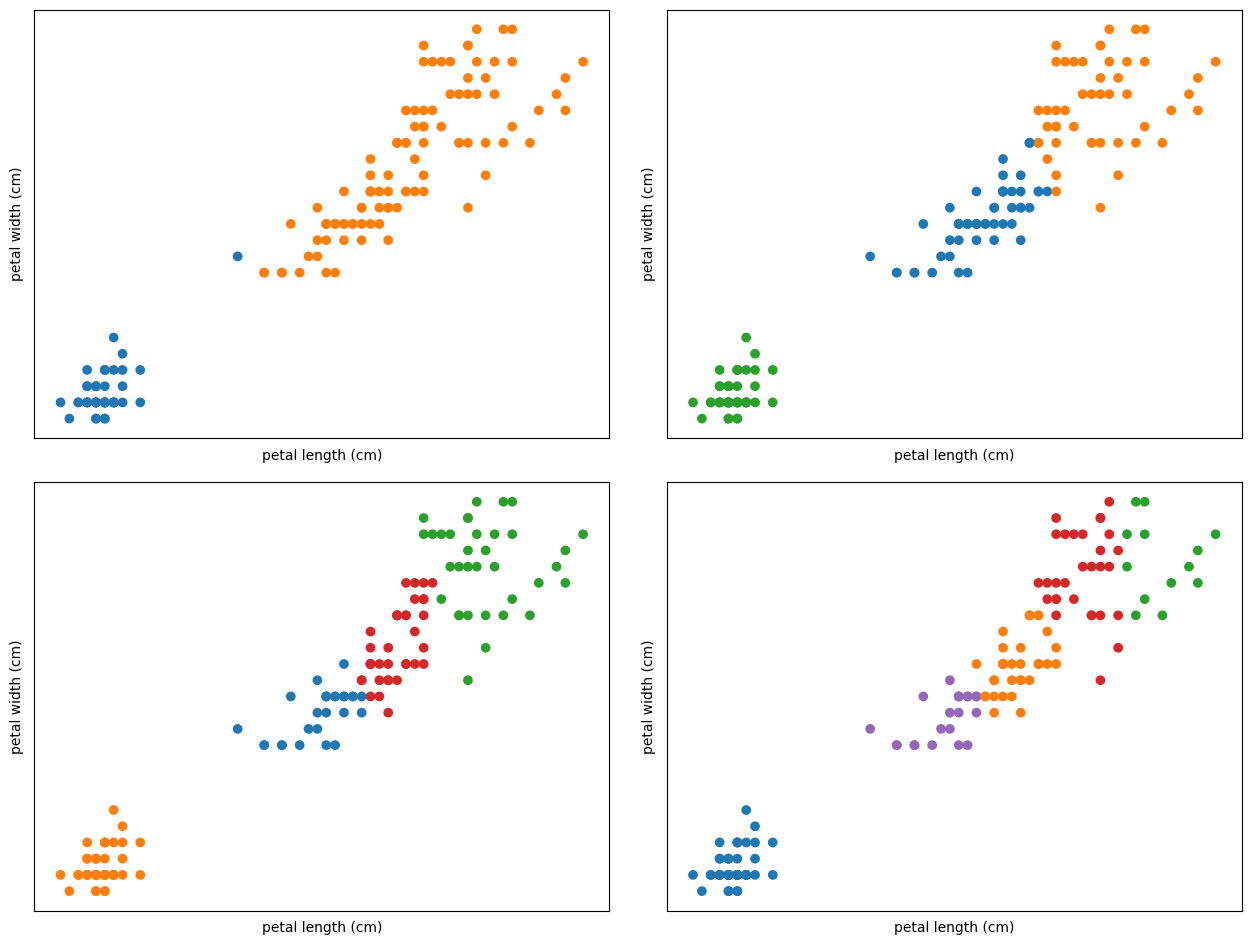

In [74]:
colors = ["C0", "C1", "C2", "C3", "C4"]

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
fig.set_size_inches(12.8, 9.6)
fig.tight_layout()

for n_clusters in [2, 3, 4, 5]:
    curr_axes = axes[n_clusters-2]
    cmap = ListedColormap(colors[:n_clusters])
    kmeans = KMeans(n_clusters=n_clusters).fit(df.iloc[:, 2:])
    curr_axes.scatter(df["petal length (cm)"], df["petal width (cm)"], c=kmeans.labels_, cmap=cmap)
    curr_axes.set_xticks(())
    curr_axes.set_yticks(())
    curr_axes.set_xlabel("petal length (cm)")
    curr_axes.set_ylabel("petal width (cm)")

# fig.savefig("Presentation Images/iris_cluster_n.svg", transparent=True)

By clustering the data into different numbers of clusters, we see that as the number of clusters increase, the variance (i.e. how spread out the data points are) of each cluster decreases.

We can visualise this in an *Elbow Plot*.

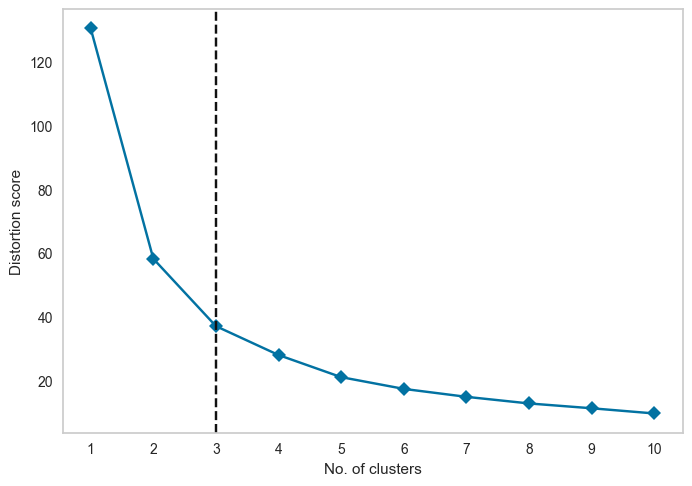

In [99]:
Elbow = KElbow(KMeans(), k=(1,11), timings=False, locate_elbow=True)
Elbow.fit(df.iloc[:, :2])
plt.xlabel("No. of clusters")
plt.ylabel("Distortion score")
plt.xticks(range(1, 11))
plt.grid(False)
# plt.savefig("Presentation Images/elbow.svg", transparent=True)

# Dimensionality Reduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

## 2D to 1D

Let's say we have 2 variables:

$x_1$ : Length to Nearest 1cm

$x_2$ : Length to Nearest 0.1cm

We want to reduce them to 1 variable:

$z$ : "Length"

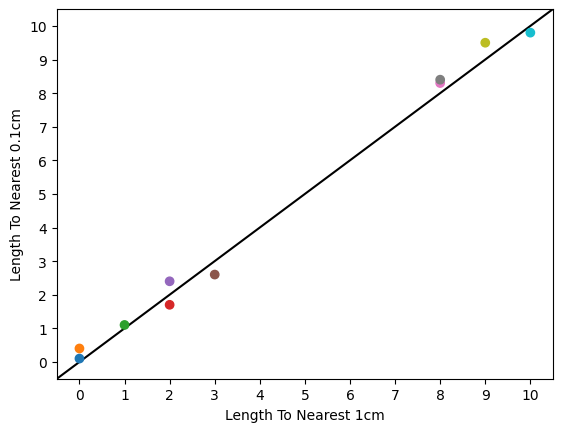

In [112]:
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
cmap = ListedColormap(colors)
lengths = [0.1, 0.4, 1.1, 1.69, 2.43, 2.6, 8.3, 8.4, 9.49, 9.78]
plt.scatter(np.round(lengths), np.round(lengths, 1), cmap=cmap, c=range(10))
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xticks(range(11))
plt.yticks(range(11))
plt.xlabel("Length To Nearest 1cm")
plt.ylabel("Length To Nearest 0.1cm")
# plt.savefig("Presentation Images/2D_reduction_1.svg", transparent=True)
plt.plot([-0.5, 10.5], [-0.5, 10.5], color="k", zorder=-1)
# plt.savefig("Presentation Images/2D_reduction_2.svg", transparent=True)
plt.show()

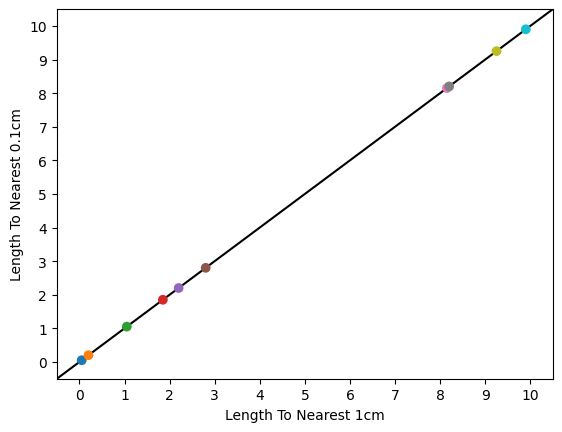

In [114]:
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xticks(range(11))
plt.yticks(range(11))
plt.xlabel("Length To Nearest 1cm")
plt.ylabel("Length To Nearest 0.1cm")

posVecs = np.c_[np.round(lengths), np.round(lengths, 1)]
plt.scatter(posVecs.mean(axis=1), posVecs.mean(axis=1), cmap=cmap, c=range(10))
plt.plot([-0.5, 10.5], [-0.5, 10.5], color="k", zorder=-1)
# plt.savefig("Presentation Images/2D_reduction_3.svg", transparent=True)
plt.show()

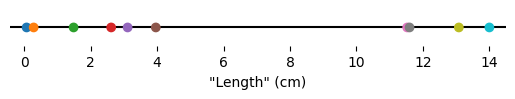

In [119]:
dotPdts = np.einsum("ij, j -> i", posVecs, [1/np.sqrt(2), 1/np.sqrt(2)])
plt.scatter(dotPdts, np.repeat(0, 10), cmap=cmap, c=range(10))
plt.plot([dotPdts.min() - 0.5, dotPdts.max() + 0.5], [0, 0], color="k", zorder=-1)
plt.xlim(dotPdts.min() - 0.5, dotPdts.max() + 0.5)
plt.yticks([])
plt.gca().set_aspect(10)
plt.box(False)
plt.xlabel("\"Length\" (cm)")

# plt.savefig("Presentation Images/2D_reduction_4.svg", transparent=True)
plt.show()

## 3D to 2D

We generate some data.

In [3]:
colors = ["C1"]
cmap = ListedColormap(colors)


u, v = np.array([1, 3, 5]), np.array([5, 3, 1])
mu_u, mu_v = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
mu = np.c_[mu_u.ravel(), mu_v.ravel()]
p_plane = np.einsum("i, j -> ij", mu[:,0], u) + np.einsum("i, j -> ij", mu[:,1], v)
p_data = p_plane + 3*(np.random.rand(2500, 3)-0.5)

Plot the data.

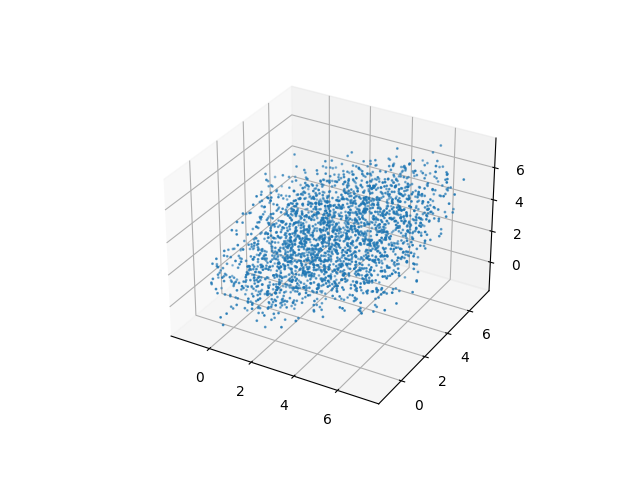

In [5]:
%matplotlib widget
ax = plt.axes(projection='3d')
ax.scatter3D(*p_data.T, s=1)

plt.show()

We notice that the points are quite flat. If we imagine it to be a cuboid (the shape of your pillow), it seems that it is quite flat in dimension.

We can plot a plane to see the rough shape of the data.

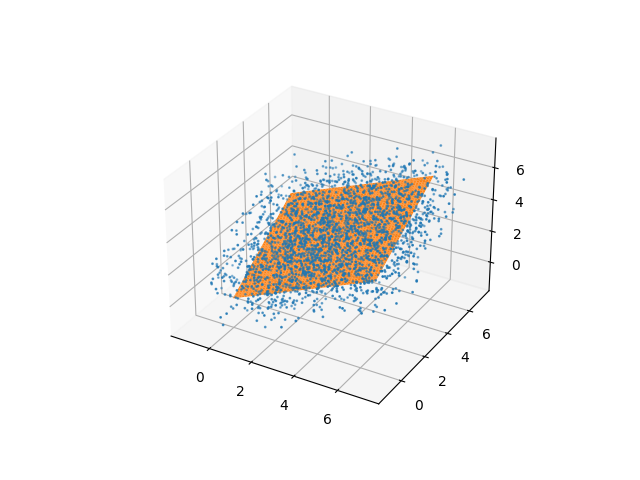

In [6]:
%matplotlib widget
ax = plt.axes(projection='3d')
ax.scatter3D(*p_data.T, s=1)
ax.plot_trisurf(*p_plane.T, cmap=cmap)
plt.show()

We can project the points onto the plane without losing much information because there is not much variation normal to (or perpendicular to) the plane. Most of the variation of the data is along the plane. This reduces the the data from 3 dimensions to 2 dimensions.

To do so, we use the Principal Component Analysis (PCA) algorithm. (How it works is outside the scope of this lesson - it includes rather involved linear algebra.)

PCA does 2 things here:
1. Find the plane that contains as much information (ie variation) of the data as possible. We want to lose as little infomration as possible.
2. Project the points onto the plane. (Simple A level math for 3D to 2D, but more generally PCA can reduce any no. of dimensions to any smaller no. of dimensions, e.g. 10D to 4D, 50671D to 567D.)

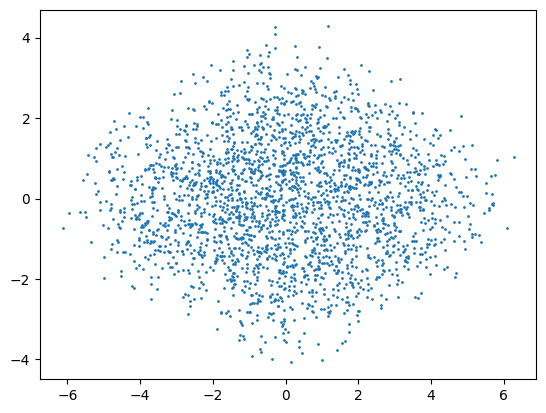

In [8]:
%matplotlib inline
pca = PCA(n_components=2)
pca.fit(p_data)
data_red = pca.transform(p_data)
plt.scatter(*data_red.T, s=1)

That was the variation of the data along the plane. Our data has been reduced from 3D to 2D!

We can see this data in the 3D space too.

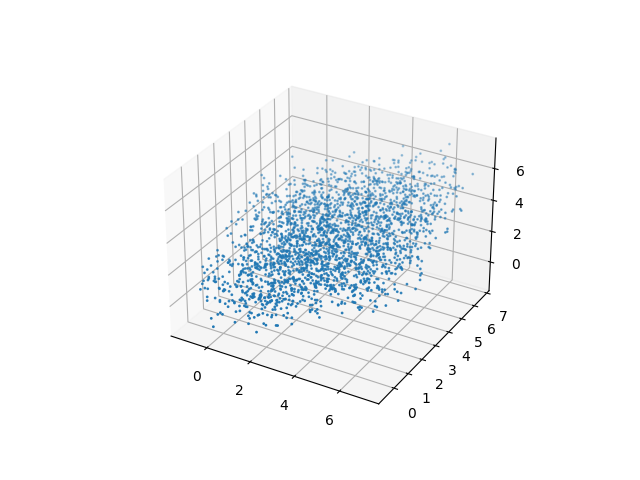

In [9]:
%matplotlib widget
ax = plt.axes(projection="3d")
ax.scatter3D(*pca.inverse_transform(data_red).T, s=1)
plt.show()

We can see that all the data is projected onto the plane.

We can compare the reduced data with the raw data, as PCA allows us to convert the reduced 2D data back to 3D (with information loss).

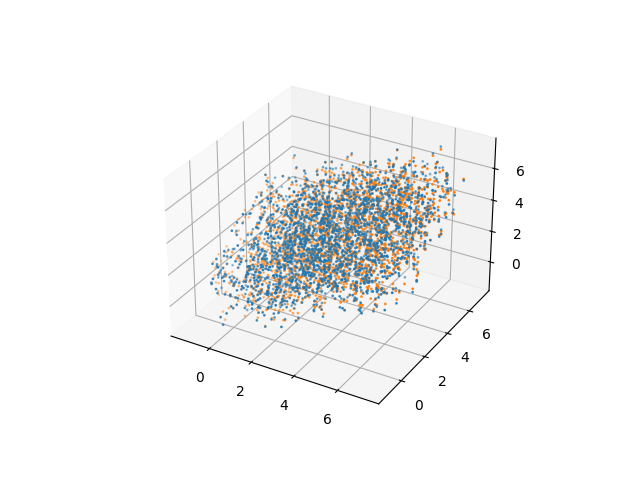

In [10]:
%matplotlib widget
ax = plt.axes(projection="3d")
ax.scatter3D(*p_data.T, s=1)
ax.scatter3D(*pca.inverse_transform(data_red).T, s=1)
plt.show()

## MNIST Dataset

# Customer Segmentation

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Loading the Data

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t", skiprows=[0])
print("Number of rows:", len(data))
print("Number of columns:", data.shape[-1])
data.head()

Number of rows: 2240
Number of columns: 29


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

__Column Labels__

_About People_  
`ID`: Customer's unique identifier  
`Year_Birth`: Customer's birth year  
`Education`: Customer's education level  
`Marital_Status`: Customer's marital status  
`Income`: Customer's yearly household income  
`Kidhome`: Number of children in customer's household  
`Teenhome`: Number of teenagers in customer's household  
`Dt_Customer`: Date of customer's enrollment with the company  
`Recency`: Number of days since customer's last purchase  
`Complain`: 1 if the customer complained in the last 2 years, 0 otherwise  

_About Products_  
`MntWines`: Amount spent on wine in last 2 years  
`MntFruits`: Amount spent on fruits in last 2 years  
`MntMeatProducts`: Amount spent on meat in last 2 years  
`MntFishProducts`: Amount spent on fish in last 2 years  
`MntSweetProducts`: Amount spent on sweets in last 2 years  
`MntGoldProds`: Amount spent on gold in last 2 years  

_About Campaigns/Promotions_  
`NumDealsPurchases`: Number of purchases made with a discount  
`AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
`AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
`AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
`AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
`AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
`Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise  

_About Forms of Purchase_  
`NumWebPurchases`: Number of purchases made through the company’s website  
`NumCatalogPurchases`: Number of purchases made using a catalogue  
`NumStorePurchases`: Number of purchases made directly in stores  
`NumWebVisitsMonth`: Number of visits to company’s website in the last month  

## Data Cleaning

Remove the rows with missing values

In [3]:
data = data.dropna()
print("No. of rows left:", len(data))

No. of rows left: 2216


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

The columns with the type "object" are non-numerical. We need to convert them to numerical values.

We begin with Dt_Customer, the date of the customer's enrolment date.

In [5]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

print("Newest customer's enrolment date:", data["Dt_Customer"].max())
print("Oldest customer's enrolment date:", data["Dt_Customer"].min())

Newest customer's enrolment date: 2014-12-06 00:00:00
Oldest customer's enrolment date: 2012-01-08 00:00:00


C:\Users\acer\AppData\Local\Temp\ipykernel_18940\682044660.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


We can convert this data to the _number of days the customer has been enrolled since the first recorded date_.

This turns our data into nice, whole numbers representing how "old" each customer is.

The new feature will be `Nd_Customer`.

In [6]:
earliestDate = data["Dt_Customer"].min()
timeDeltas = data["Dt_Customer"] - earliestDate
data["Nd_Customer"] = (timeDeltas / np.timedelta64(1,'D')).astype("int64")
data["Nd_Customer"]

0         92
1        938
2        591
3        998
4        742
        ... 
2235     522
2236    1002
2237     748
2238     747
2239     281
Name: Nd_Customer, Length: 2216, dtype: int64

Next, we look at `Marital_Status` and `Education`, which contain categorical values.

In [7]:
print("Categories in \"Marital_Status\":\n", data["Marital_Status"].value_counts(), "\n")
print("Categories in \"Education\":\n", data["Education"].value_counts())

Categories in "Marital_Status":
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Categories in "Education":
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


We see that there are some bullshit values like "Absurd" and "YOLO", we need to replace them with something reasonable.

Also, there's not much difference between "Single", "Divorced", "Widow" and "Alone" for our case here. They all have no life and can all be classified under "Alone".

So we clean the data by:
1. Replacing bullshit values
2. Grouping similar values under the same category

This is called __Feature Engineering__.

In [8]:
# Age of customer 
data["Age"] = 2022-data["Year_Birth"]
# Total spending
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
# Alone or Partnered.
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
# Total number of kids + teens
data["Children"]=data["Kidhome"]+data["Teenhome"]
# No. of members in the household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
# Parent or not
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
# Segmenting education levels into three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
# Rename columns labels for clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Dropping the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

data

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0         Graduate  58138.0        0         0       58    635      88   546   
1         Graduate  46344.0        1         1       38     11       1     6   
2         Graduate  71613.0        0         0       26    426      49   127   
3         Graduate  26646.0        1         0       26     11       4    20   
4     Postgraduate  58293.0        1         0       94    173      43   118   
...            ...      ...      ...       ...      ...    ...     ...   ...   
2235      Graduate  61223.0        0         1       46    709      43   182   
2236  Postgraduate  64014.0        2         1       56    406       0    30   
2237      Graduate  56981.0        0         0       91    908      48   217   
2238  Postgraduate  69245.0        0         1        8    428      30   214   
2239  Postgraduate  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response  Nd_Customer  Age  \
0      172      88  ...             0         0         1           92   65   
1        2       1  ...             0         0         0          938   68   
2      111      21  ...             0         0         0          591   57   
3       10       3  ...             0         0         0          998   38   
4       46      27  ...             0         0         0          742   41   
...    ...     ...  ...           ...       ...       ...          ...  ...   
2235    42     118  ...             0         0         0          522   55   
2236     0       0  ...             0         0         0         1002   76   
2237    32      12  ...             0         0         0          748   41   
2238    80      30  ...             0         0         0          747   66   
2239     2       1  ...             0         0         1          281   68   

      Spent  Living_With  Children  Family_Size  Is_Parent  
0      1617        Alone         0            1          0  
1        27        Alone         2            3          1  
2       776      Partner         0            2          0  
3        53      Partner         1            3          1  
4       422      Partner         1            3          1  
...     ...          ...       ...          ...        ...  
2235   1341      Partner         1            3          1  
2236    444      Partner         3            5          1  
2237   1241        Alone         0            1          0  
2238    843      Partner         1            3          1  
2239    172      Partner         2            4          1  

[2216 rows x 30 columns]

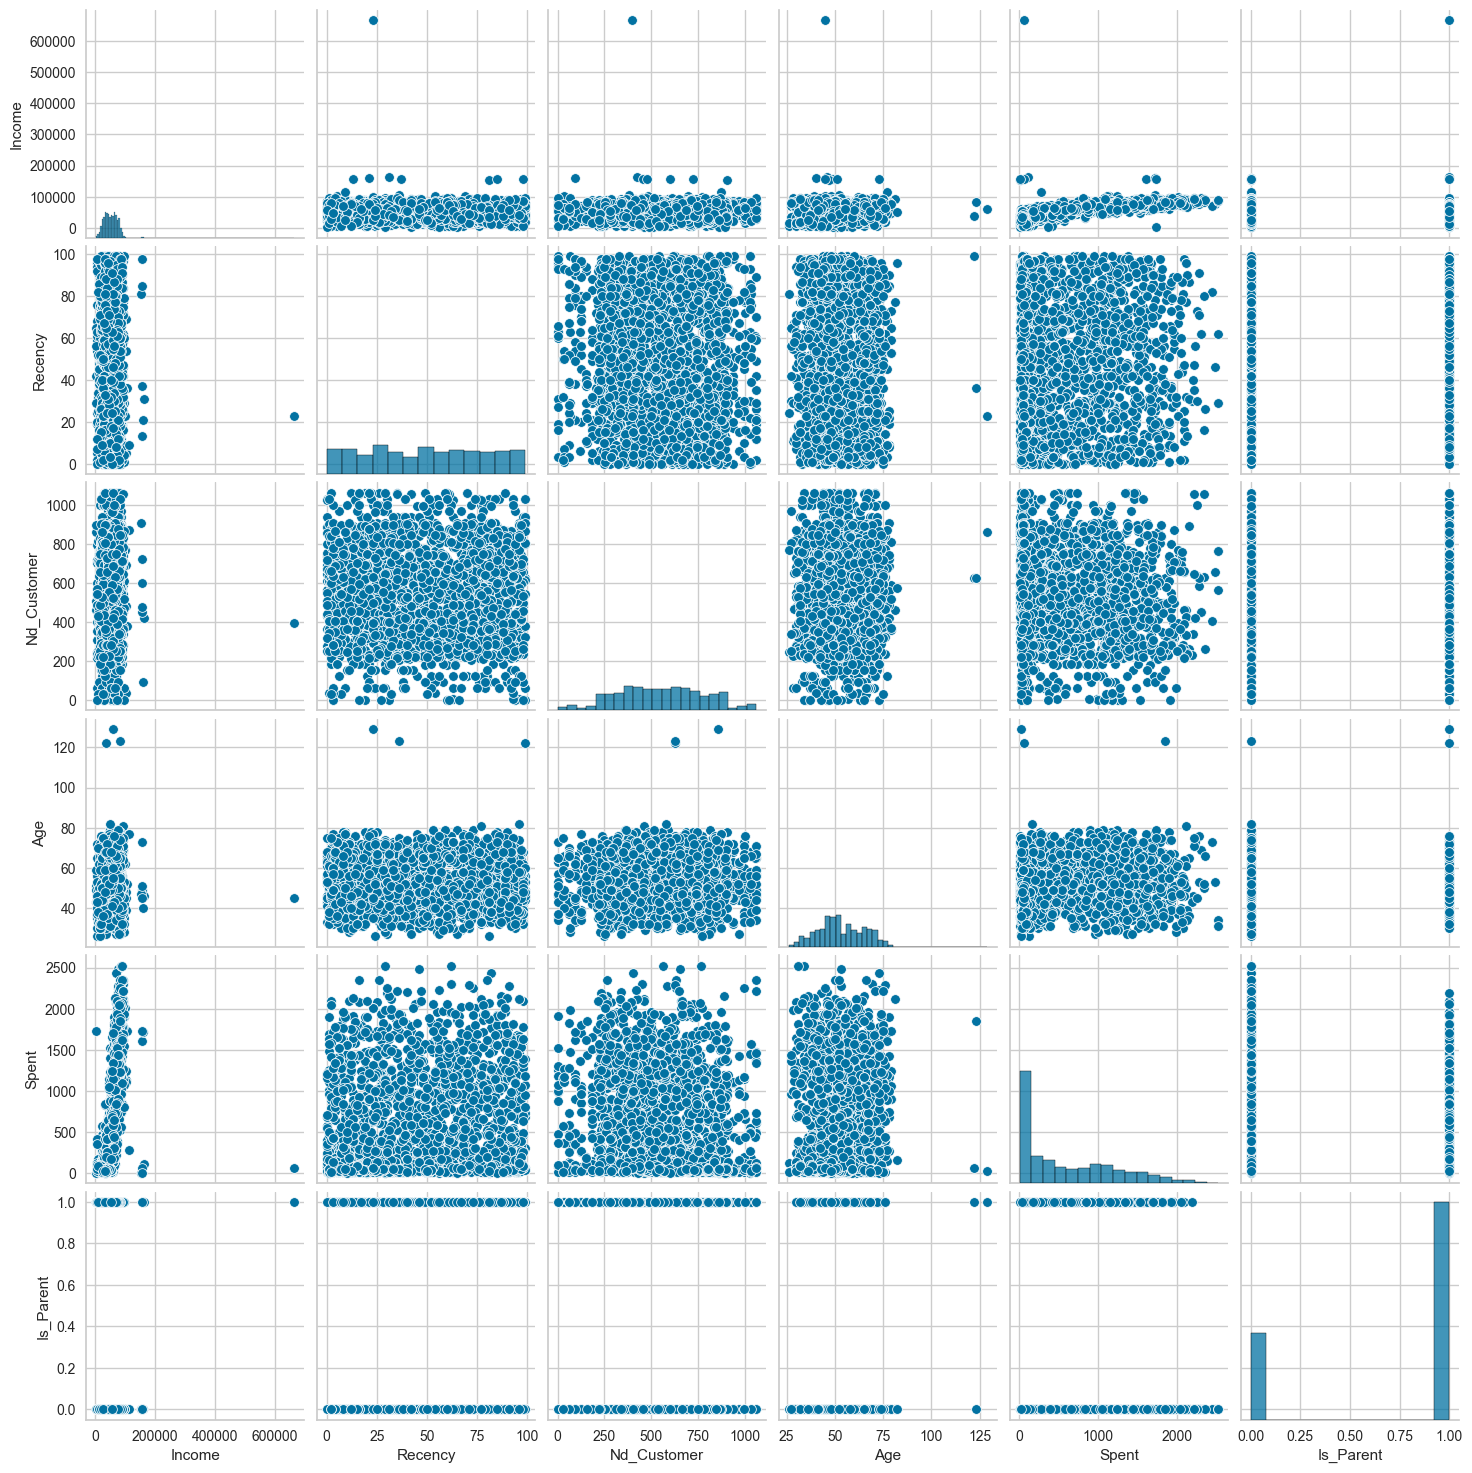

In [9]:
To_Plot = [ "Income", "Recency", "Nd_Customer", "Age", "Spent", "Is_Parent"]

sns.pairplot(data[To_Plot])
# plt.savefig("Presentation Images/pairplot.png", transparent=True)

We see some outliers with income > 600k and age > 100.

These are either incorrect inputs or extreme cases. Either way, we want to remove them so that our trained models are representative of the general population.

In [10]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("No. of rows after removing the outliers:", len(data))

No. of rows after removing the outliers: 2212


C:\Users\acer\AppData\Local\Temp\ipykernel_18940\113953677.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<AxesSubplot: >

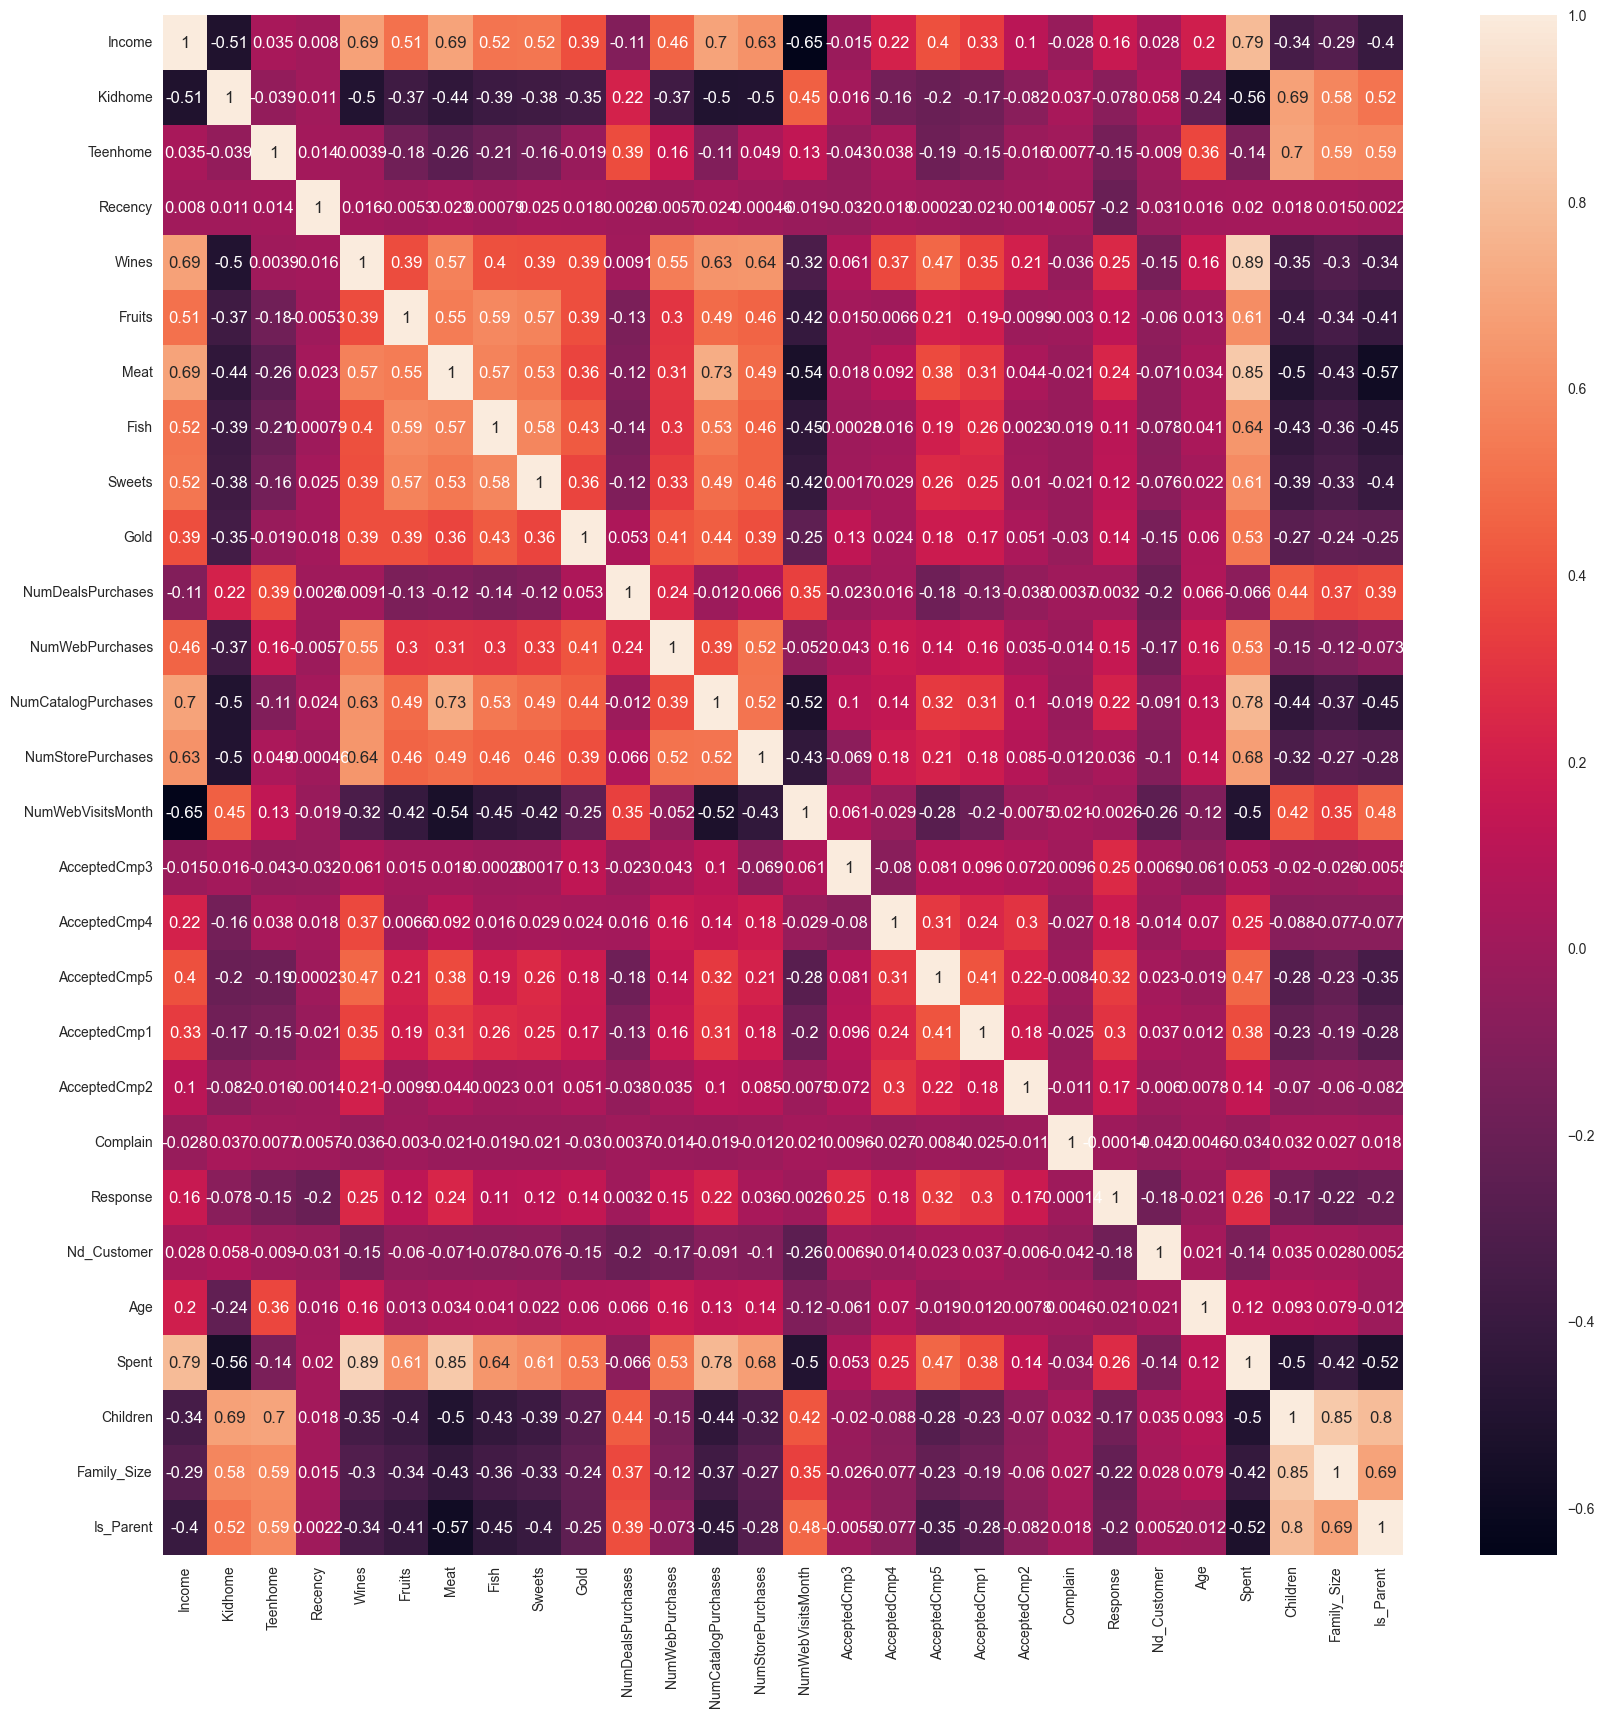

In [11]:
corrmat = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)

## Data Processing

Now we convert categorical data to numerical data.

E.g. ["Alone", "Partner", "Partner", "Alone"] -> [0, 1, 1, 0]  
"Alone" -> 0  
"Partner" -> 1

In [12]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Columns with categorical data:", object_cols)
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

data[["Education", "Living_With"]]

Columns with categorical data: ['Education', 'Living_With']


Education  Living_With
0             0            0
1             0            0
2             0            1
3             0            1
4             1            1
...         ...          ...
2235          0            1
2236          1            1
2237          0            0
2238          1            1
2239          1            1

[2212 rows x 2 columns]

In [13]:
data

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response  Nd_Customer  Age  \
0      172      88  ...             0         0         1           92   65   
1        2       1  ...             0         0         0          938   68   
2      111      21  ...             0         0         0          591   57   
3       10       3  ...             0         0         0          998   38   
4       46      27  ...             0         0         0          742   41   
...    ...     ...  ...           ...       ...       ...          ...  ...   
2235    42     118  ...             0         0         0          522   55   
2236     0       0  ...             0         0         0         1002   76   
2237    32      12  ...             0         0         0          748   41   
2238    80      30  ...             0         0         0          747   66   
2239     2       1  ...             0         0         1          281   68   

      Spent  Living_With  Children  Family_Size  Is_Parent  
0      1617            0         0            1          0  
1        27            0         2            3          1  
2       776            1         0            2          0  
3        53            1         1            3          1  
4       422            1         1            3          1  
...     ...          ...       ...          ...        ...  
2235   1341            1         1            3          1  
2236    444            1         3            5          1  
2237   1241            0         0            1          0  
2238    843            1         1            3          1  
2239    172            1         2            4          1  

[2212 rows x 30 columns]

Here we are doing __customer segmentation__. We are not interested in the _magnitude_ of the values of each column. Rather, we are interested in the _relative variation_ of the values. 

So, we scale all the columns to the same scale, to make it easier to compare the parameters later.

In [14]:
# Creating a subset of dataframe by dropping the features on deals accepted and promotions
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# Scale the data by the standard deviation
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

scaled_ds

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0     -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1     -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2     -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3     -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4      0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   
...         ...       ...       ...       ...       ...       ...       ...   
2207  -0.893586  0.430444 -0.822754  0.908097 -0.104347  1.197084  0.419540   
2208   0.571657  0.560123  2.902796  0.908097  0.241237  0.298631 -0.662628   
2209  -0.893586  0.233347 -0.822754 -0.929699  1.450778  1.787156  0.545373   
2210   0.571657  0.803172 -0.822754  0.908097 -1.417564  0.363866  0.092373   
2211   0.571657  0.042290  1.040021  0.908097 -0.311697 -0.656159 -0.587128   

          Meat      Fish    Sweets  ...  NumCatalogPurchases  \
0     1.690293  2.453472  1.483713  ...             2.503607   
1    -0.718230 -0.651004 -0.634019  ...            -0.571340   
2    -0.178542  1.339513 -0.147184  ...            -0.229679   
3    -0.655787 -0.504911 -0.585335  ...            -0.913000   
4    -0.218684  0.152508 -0.001133  ...             0.111982   
...        ...       ...       ...  ...                  ...   
2207  0.066770  0.079461  2.213965  ...             0.111982   
2208 -0.611184 -0.687527 -0.658360  ...            -0.229679   
2209  0.222878 -0.103155 -0.366260  ...             0.111982   
2210  0.209498  0.773403  0.071892  ...             0.795303   
2211 -0.472917 -0.651004 -0.634019  ...            -0.571340   

      NumStorePurchases  NumWebVisitsMonth  Nd_Customer       Age     Spent  \
0             -0.555814           0.692181    -1.973583  1.018352  1.676245   
1             -1.171160          -0.132545     1.665144  1.274785 -0.963297   
2              1.290224          -0.544908     0.172664  0.334530  0.280110   
3             -0.555814           0.279818     1.923210 -1.289547 -0.920135   
4              0.059532          -0.132545     0.822130 -1.033114 -0.307562   
...                 ...                ...          ...       ...       ...   
2207          -0.555814          -0.132545    -0.124112  0.163575  1.218061   
2208          -0.248141           0.692181     1.940414  1.958607 -0.271040   
2209           2.213242           0.279818     0.847936 -1.033114  1.052052   
2210           1.290224          -0.957271     0.843635  1.103830  0.391336   
2211          -0.555814           0.692181    -1.160676  1.274785 -0.722584   

      Living_With  Children  Family_Size  Is_Parent  
0       -1.349603 -1.264598    -1.758359  -1.581139  
1       -1.349603  1.404572     0.449070   0.632456  
2        0.740959 -1.264598    -0.654644  -1.581139  
3        0.740959  0.069987     0.449070   0.632456  
4        0.740959  0.069987     0.449070   0.632456  
...           ...       ...          ...        ...  
2207     0.740959  0.069987     0.449070   0.632456  
2208     0.740959  2.739158     2.656499   0.632456  
2209    -1.349603 -1.264598    -1.758359  -1.581139  
2210     0.740959  0.069987     0.449070   0.632456  
2211     0.740959  1.404572     1.552784   0.632456  

[2212 rows x 23 columns]

## Dimensionality Reduction

Having 23 columns means having 23 dimensions. It is very difficult to visualise and analyse this many dimensions.

So, we shall reduce the data to 3 dimensions.

In [15]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

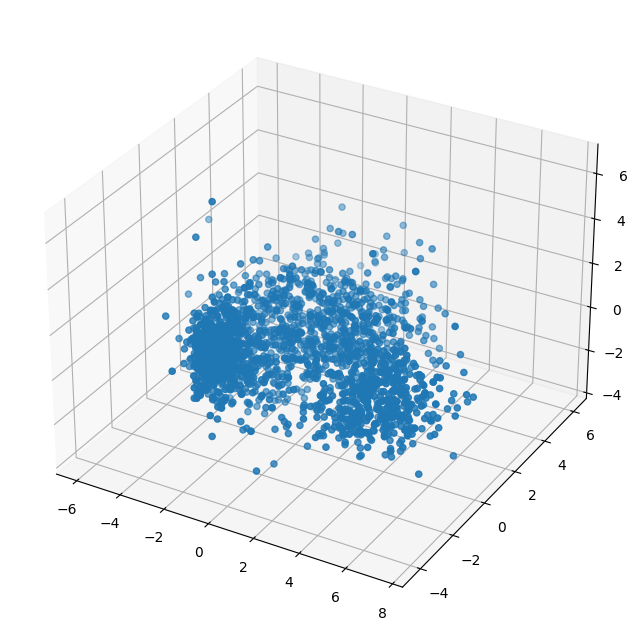

In [36]:
matplotlib.rc_file_defaults()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(*PCA_ds.T.values)
plt.show()

## Clustering

First, we use the elbow method to determine an appropriate no. of clusters.

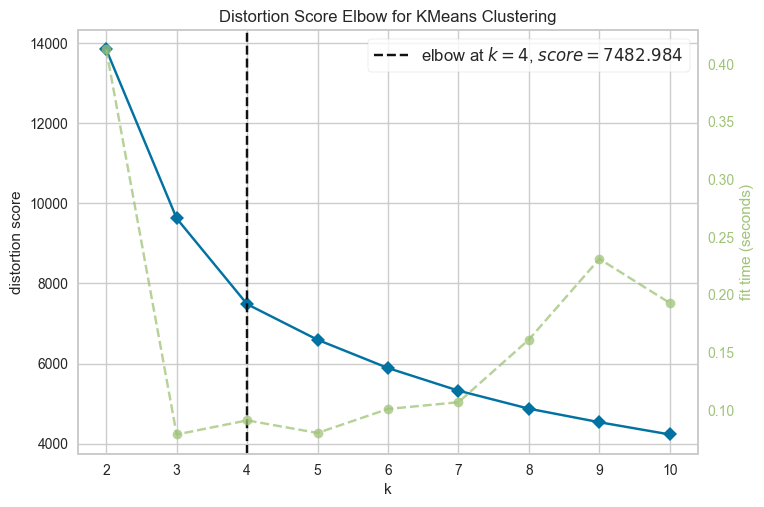

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Then, we perform k means clustering with 4 clusters.

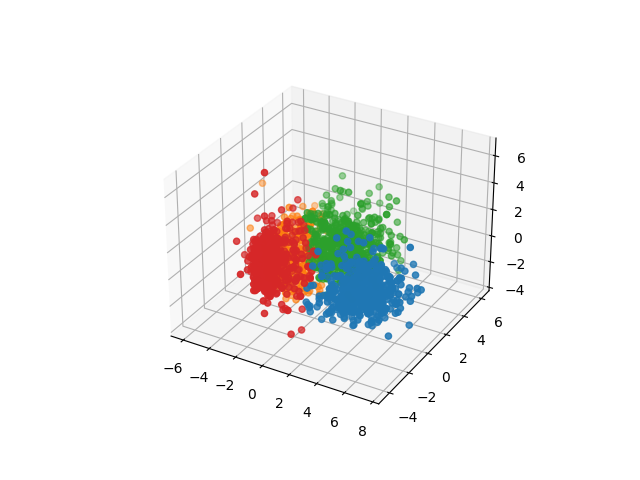

In [94]:
%matplotlib widget
kmeans = KMeans(n_clusters=4)
clusterLabels = kmeans.fit_predict(PCA_ds)

cmap = ListedColormap(["C0", "C1", "C2", "C3"])
ax = plt.subplot(111, projection='3d')
ax.scatter(*PCA_ds.T.values, c=clusterLabels, cmap=cmap)
plt.show()

## Analysis

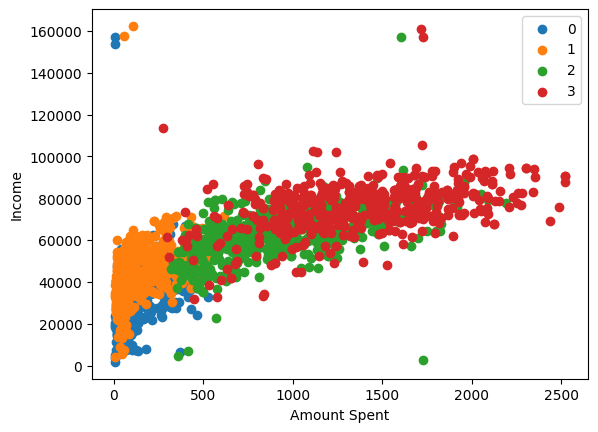

In [97]:
%matplotlib inline
clusters = np.unique(clusterLabels)

# Sort clusters by average amount spent
amountSpentMeans = []
for cluster in clusters:
    amountSpentMeans.append(data["Spent"][clusterLabels==cluster].mean())
d = {}
for key, value in zip(np.argsort(amountSpentMeans), clusters):
    d[key] = value
data["Clusters"] = clusterLabels
data["Clusters"] = data["Clusters"].replace(d)

for cluster in np.unique(data["Clusters"]):
    cond = data["Clusters"]==cluster
    plt.scatter(data["Spent"][cond], data["Income"][cond], label=cluster)
plt.xlabel("Amount Spent")
plt.ylabel("Income")
plt.legend()
plt.show()

We can see that:
* group 0: low spending & low income
* group 1: low spending & medium income
* group 2: medium spending & high income 
* group 3: high spending spending & high income 

Group 3 are our star customers. They spend a lot and have high income, so they can afford to spend even more.

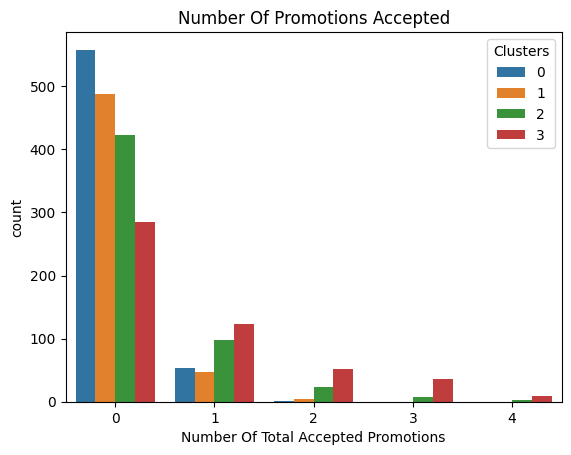

In [102]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"])
pl.set_title("Number Of Promotions Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

We see that the response to campaigns is rather poor. Perhaps better-targeted and well-planned campaigns are required to boost sales. 

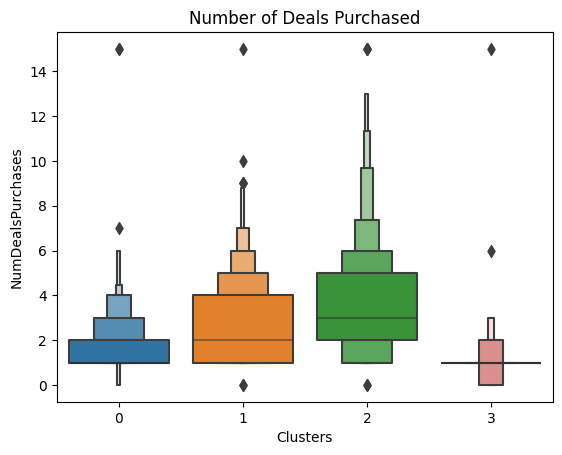

In [103]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

The number of deals purchased is pretty high. However, our star customers (group 3) are not that into deals. Maybe they have too much money so they're not into discounts?

Suggestion: consider allocating more money to promoting campaigns rather than one-off discounts (deals).

Next, we look at forms of purchase.

<Figure size 640x480 with 0 Axes>

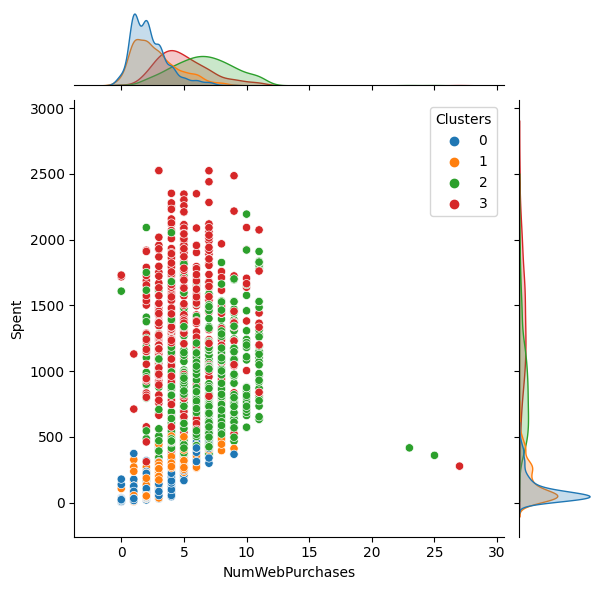

<Figure size 640x480 with 0 Axes>

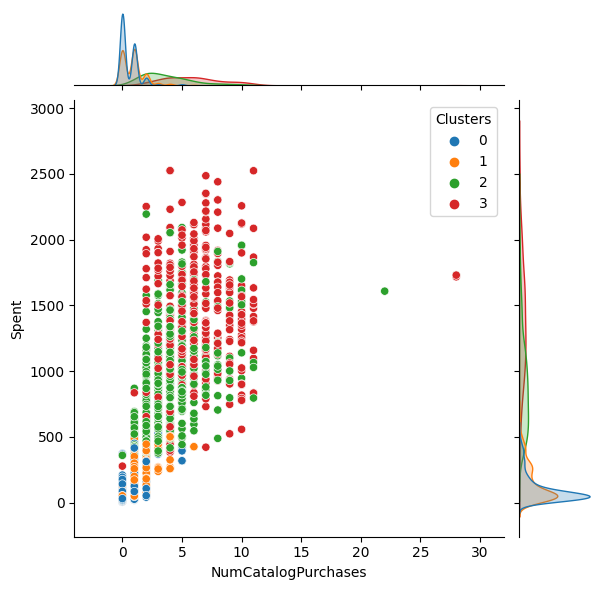

<Figure size 640x480 with 0 Axes>

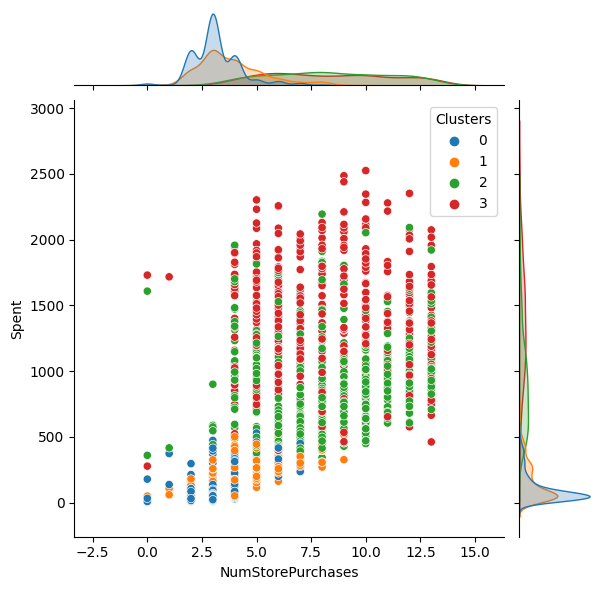

In [108]:
matplotlib.rc_file_defaults()

Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], palette=["C0", "C1", "C2", "C3"])
    plt.show()

Sales are distributed pretty evenly.

Let's see who are in these clusters

<Figure size 640x480 with 0 Axes>

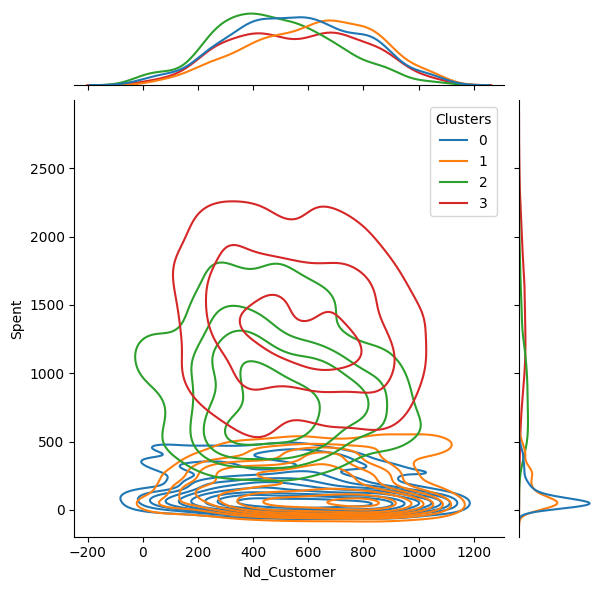

<Figure size 640x480 with 0 Axes>

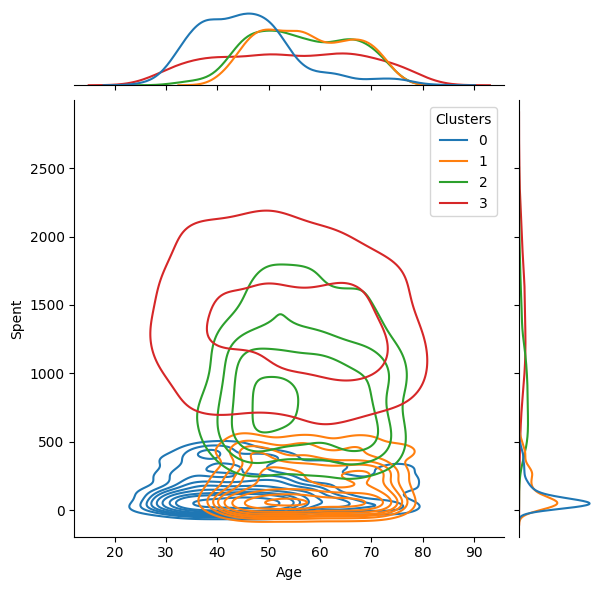

<Figure size 640x480 with 0 Axes>

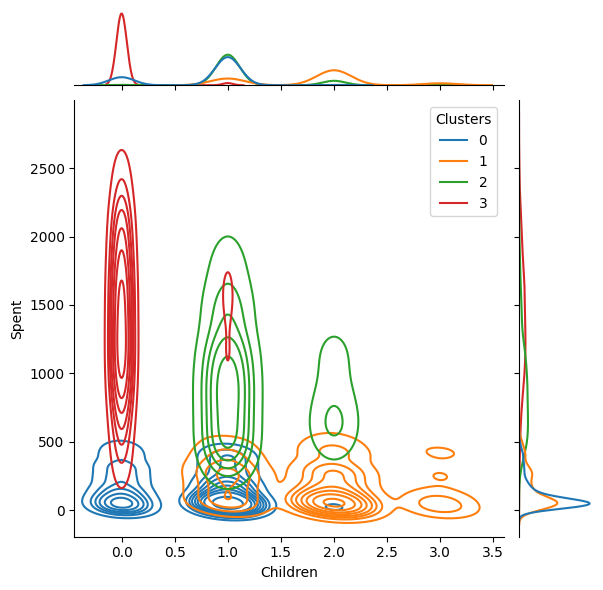

<Figure size 640x480 with 0 Axes>

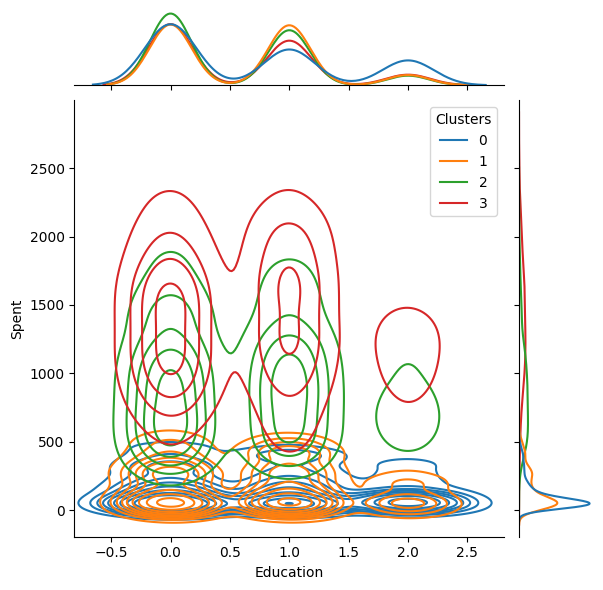

<Figure size 640x480 with 0 Axes>

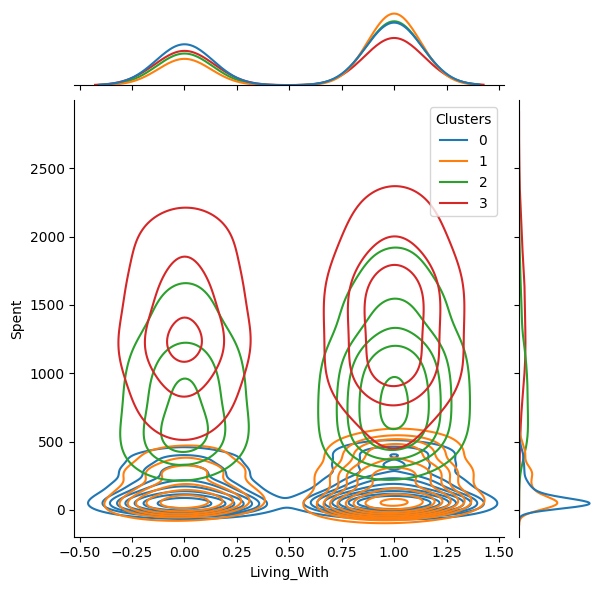

In [110]:
Personal = ["Nd_Customer", "Age", "Children", "Education", "Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], kind="kde", palette=["C0", "C1", "C2", "C3"])
    plt.show()

Group 0: 
1. Young adults
2. Mostly parents with 1 child
3. Mostly single
4. 2 and 3 suggests some single parents
5. Low spenders and low income (low priority)

Group 1:
1. Older adults
2. Mostly parents with 2 children
3. Mostly single
4. 2 and 3 suggests some single parents
5. Low spenders and medium income (medium priority)

Group 2:
1. Older adults
2. Mostly parents with 1 child
3. Mostly attached
4. Medium spenders with high income (high priority)

Group 3:
1. Spans all ages
2. Not parents
3. Slightly more attached than single
4. High spenders with high income (high priority)

Suggestion: 
* Focus on marketing to older, married adults

# Data Processing

## Moving Average

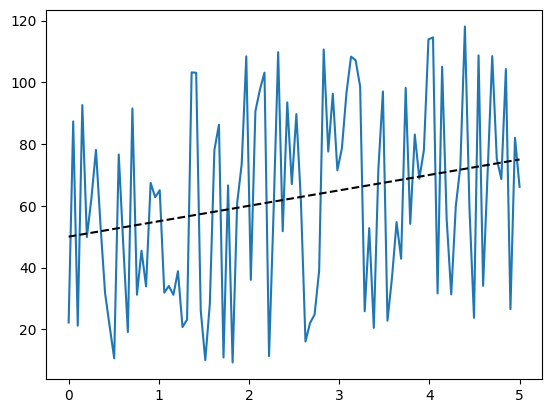

In [140]:
np.random.seed(5)
x = np.linspace(0, 5, 100)
y = 5*x + 100*(np.random.rand(100)-0.5) + 50
plt.plot(x,y)
plt.plot(x, 5*x+50, color="k", linestyle="--")

In [141]:
n_ave = 10
x_ave = np.convolve(x, np.ones(n_ave), "valid")/n_ave
y_ave = np.convolve(y, np.ones(n_ave), "valid")/n_ave

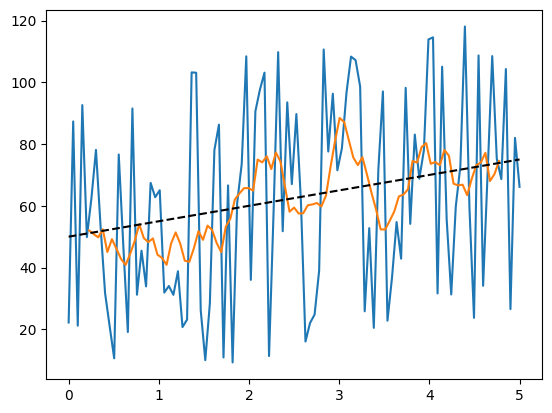

In [142]:
plt.plot(x,y)
plt.plot(x_ave, y_ave)
plt.plot(x, 5*x+50, color="k", linestyle="--")